# Stochastic Signal Detection (SSD)

In what follows, we compute the relevant objects to compute the behaviour of the Renormalization Group (RG).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sympy import *

init_printing(
    use_unicode=True,
    use_latex=True,
    pretty_print=True,
    wrap_line=True,
)

## Functional Renormalization Group

The _Functional Renormalization Group_ (FRG) is a powerful tool to describe the behaviour of the effective degrees of freedom of a quantum field theory.
In this case, we focus on the flow of the potential of the stochastic field theory in _Local Potential Approximation_ (LPA).
Specifically, we solve:
$$
\dot{\overline{\mathcal{U_k^\prime}}}[\overline{\chi}]
=
- \mathrm{dim}_{\tau}(\overline{\mathcal{U_k^\prime}})\, \overline{\mathcal{U_k^\prime}}[\overline{\chi}]
+ \mathrm{dim}_{\tau}(\chi)\, \overline{\chi}\, \overline{\mathcal{U_k^{\prime\prime}}}[\overline{\chi}]
-2
\frac{
    3\, \overline{\mathcal{U_k^{\prime\prime}}}[\overline{\chi}]
    + 2\, \overline{\chi}\, \overline{\mathcal{U_k^{\prime\prime\prime}}}[\overline{\chi}]
}{
    (1 + \overline{\mu}^2)^2
}
$$
where $\overline{\mu}^2 = \overline{\mathcal{U_k^\prime}}[\overline{\chi}] + 2 \overline{\chi} \overline{\mathcal{U_k^{\prime\prime}}}[\overline{\chi}]$ and, in general, $\dot{X} = \frac{\mathrm{d}X}{\mathrm{d}\tau}$, for the stochastic "time" $\tau$.
Specifically, in the equation:
$$
\mathrm{dim}_{\tau}(\overline{\mathcal{U_k^\prime}})
=
2 \dot{s}
=
2 \frac{\int\limits_{0}^{k} p \rho{\left(p^{2} \right)}\, \mathrm{d}p}{k^{2} \rho{\left(k^{2} \right)}}
=
\frac{2\, \mathrm{I}(k)}{k^{2} \rho{\left(k^{2} \right)}},
$$
where $\mathrm{I}(k) = \int\limits_{0}^{k} p \rho{\left(p^{2} \right)}\, \mathrm{d}p$,
and
$$
\mathrm{dim}_{\tau}(\chi)
=
\dot{s}\, \frac{\mathrm{d}}{\mathrm{d}s} \ln(\rho(k^2)\, \dot{s})
=
2 - \frac{2 \left(\int\limits_{0}^{k} p \rho{\left(p^{2} \right)}\, \mathrm{d}p\right) \left. \frac{d}{d \xi_{1}} \rho{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=k^{2} }}}{\rho^{2}{\left(k^{2} \right)}} - \frac{4 \int\limits_{0}^{k} p \rho{\left(p^{2} \right)}\, \mathrm{d}p}{k^{2} \rho{\left(k^{2} \right)}}
=
2 - \frac{2\, \mathrm{I}(k)\; \left. \frac{d}{d \xi_{1}} \rho{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=k^{2} }}}{\rho^{2}{\left(k^{2} \right)}} - \frac{4\, \mathrm{I}(k)}{k^{2} \rho{\left(k^{2} \right)}}
$$
since $s = \ln k$ and $\tau = \ln{\left(\int\limits_{0}^{k} p \rho{\left(p^{2} \right)}\, \mathrm{d}p \right)}$.
After some simplifications, we get to:
$$
\mathrm{dim}_{\tau}(\chi)
=
2 -
\mathrm{dim}_{\tau}(\overline{\mathcal{U_k^\prime}})\,
\left(
\frac{k^{2} \left. \frac{d}{d \xi_{1}} \rho{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=k^{2} }}}{\rho{\left(k^{2} \right)}} + 2
\right).
$$

In [3]:
x = Symbol(r'\overline{\chi}', real=True)
p = Symbol('p', real=True)
k = Symbol('k', real=True)
f = Function(r'\overline{\mathcal{U_k^\prime}}', real=True)
r = Function(r'\rho', real=True)

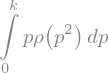

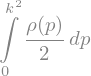

In [4]:
# Define the main objects of the simulation
I = Integral(p * r(p**2), (p, 0, k))
I_sub = I.transform(p**2, p)
t = log(I)
s = log(k)

display(I)
display(I_sub)

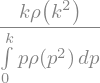

In [13]:
# Use the chain rule to translate the derivative over tau in derivative over k
# diff(f, t) = diff(f, k) * diff(k, t) = diff(f, k) * (1 / diff(t, k))
diff(t, k)

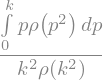

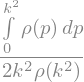

In [5]:
# Compute the derivative of s with respect to tau
dsdt = diff(s, k) / diff(t, k)
display(dsdt)
display(dsdt.subs(I, I_sub).simplify())

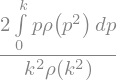

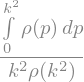

In [6]:
# Compute the anomalous dimension of the potential
dimU = 2 * dsdt
dimU_sub = dimU.subs(I, I_sub)

display(dimU.simplify())
display(dimU_sub.simplify())

dimU_latex = latex(dimU.simplify())
dimU_sub_latex = latex(dimU_sub.simplify())

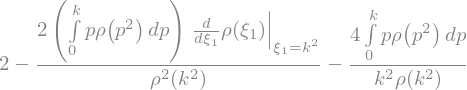

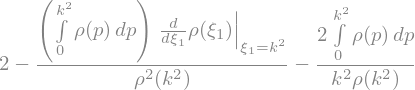

In [7]:
# Compute the anomalous dimension of the field
der = log(r(k**2) * dsdt**2)
dimChi = dsdt * diff(der, k) / diff(s, k)
dimChi_sub = dimChi.subs(I, I_sub)

display(dimChi.simplify())
display(dimChi_sub.simplify())

dimChi_latex = latex(dimChi.simplify())
dimChi_sub_latex = latex(dimChi_sub.simplify())

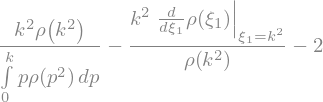

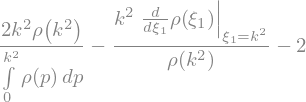

In [8]:
# Possible simplifications
ratio = (dimChi / dimU).expand()
display(ratio)
display(ratio.subs(I, I_sub).simplify())